# 电商数据分析
- 读取数据
- 清洗数据
- 数据分析

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

## 1.读取数据

In [2]:
data = pd.read_csv('./data/dataset.csv')

#简单浏览下数据
data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,1,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
1,2,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium
2,3,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
3,4,IT-2011-3647632,2011/1/1,2011/1/5,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,5,HU-2011-1220,2011/1/1,2011/1/5,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


## 查看数据

In [3]:
data.shape

(51101, 24)

In [4]:
# 数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51101 entries, 0 to 51100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          51101 non-null  int64  
 1   OrderID        51101 non-null  object 
 2   OrderDate      51101 non-null  object 
 3   ShipDate       51101 non-null  object 
 4   ShipMode       51090 non-null  object 
 5   CustomerID     51101 non-null  object 
 6   CustomerName   51101 non-null  object 
 7   Segment        51101 non-null  object 
 8   City           51101 non-null  object 
 9   State          51101 non-null  object 
 10  Country        51101 non-null  object 
 11  PostalCode     9962 non-null   float64
 12  Market         51101 non-null  object 
 13  Region         51101 non-null  object 
 14  ProductID      51101 non-null  object 
 15  Category       51101 non-null  object 
 16  Sub-Category   51101 non-null  object 
 17  ProductName    51101 non-null  object 
 18  Sales 

In [5]:
data.count()

RowID            51101
OrderID          51101
OrderDate        51101
ShipDate         51101
ShipMode         51090
CustomerID       51101
CustomerName     51101
Segment          51101
City             51101
State            51101
Country          51101
PostalCode        9962
Market           51101
Region           51101
ProductID        51101
Category         51101
Sub-Category     51101
ProductName      51101
Sales            51101
Quantity         51101
Discount         51101
Profit           51101
ShippingCost     51101
OrderPriority    51101
dtype: int64

In [6]:
# 数据整体描述
data.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit,ShippingCost
count,51101.000000,9962.000000,51101.000000,51101.000000,51101.000000,51101.000000,51101.000000
mean,25548.867987,55225.189319,246.568891,3.476018,0.143468,28.518805,26.383634
std,14751.024724,32062.973837,487.764812,2.279123,0.213399,174.480944,57.284384
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12774.000000,23223.000000,30.816000,2.000000,0.000000,0.000000,2.610000
50%,25549.000000,57103.000000,85.140000,3.000000,0.000000,9.240000,7.800000
75%,38323.000000,90008.000000,251.100000,5.000000,0.200000,36.810000,24.450000
max,51098.000000,99301.000000,22638.480000,14.000000,1.500000,8399.976000,933.570000


## 2.清洗数据
- 缺失值
- 异常值
- 重复值

### 2.1 清洗重复值

In [7]:
# 整体去重
# data[data.duplicated()]
data.drop_duplicates(inplace=True)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,1,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
1,2,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium
2,3,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
3,4,IT-2011-3647632,2011/1/1,2011/1/5,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,5,HU-2011-1220,2011/1/1,2011/1/5,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014/12/31,2015/1/5,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,OFF-FA-10000263,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium
51097,51095,TU-2014-5170,2014/12/31,2015/1/4,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,FUR-TEN-10000558,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium
51098,51096,MO-2014-2560,2014/12/31,2015/1/5,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium
51099,51097,ES-2014-4785777,2014/12/31,2015/1/4,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,OFF-BI-10000620,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium


In [8]:
# 针对‘RowID ’列去重
# data[data['RowID'].duplicated()]
data.drop(index=data[data['RowID'].duplicated()].index, inplace=True)

### 2.2 清洗缺失值
- 删除
- 填充（平均值、中位数、众数等）

In [9]:
# 获取含有空值的行
# data[data.isnull().T.any()]

# 各列空值的统计
# data.isnull().sum()

#  查看缺失率
data.apply(lambda x:x.isnull().sum()/len(x))

RowID            0.000000
OrderID          0.000000
OrderDate        0.000000
ShipDate         0.000000
ShipMode         0.000215
CustomerID       0.000000
CustomerName     0.000000
Segment          0.000000
City             0.000000
State            0.000000
Country          0.000000
PostalCode       0.805041
Market           0.000000
Region           0.000000
ProductID        0.000000
Category         0.000000
Sub-Category     0.000000
ProductName      0.000000
Sales            0.000000
Quantity         0.000000
Discount         0.000000
Profit           0.000000
ShippingCost     0.000000
OrderPriority    0.000000
dtype: float64

### 处理‘PostalCode’列

In [10]:
# 删除‘PostalCode’列（空值多，且与业务关系不大）
data.drop(columns=['PostalCode'],inplace=True)

### 处理'ShipMode'列

In [17]:
# 获取一下'ShipMode'列含有空值的行
# data[data['ShipMode'].isnull()]

# 统计'ShipMode'
# data['ShipMode'].unique()
data.groupby(['ShipMode']).count()

# 用众数对‘ShipMode'列进行填充
data['ShipMode'].fillna(value=data.ShipMode.mode()[0],inplace=True)

### 2.3 清洗异常值

In [12]:
# 处理与业务流程不符合数据

# 1）删除发货时间早于下单日期的数据
data.drop(index=data[data['ShipDate']<data['OrderDate']].index,inplace=True)

# 2）删除售价为负的数据
data.drop(index=data[data['Sales']<0].index,inplace=True)

# 3） 将折扣大于1的数据替换成nan,然后用平均值进行填充
data['Discount'] = data['Discount'].mask(data['Discount']>1,None)

# 计算'Discount'的平均值
# data[data['Discount'].notnull()]['Discount'].mean()
# data['Discount'].mean()

# 对'Discount'的空值进行填充
data['Discount'].fillna(value=round(data['Discount'].mean(),2),inplace=True)


### 2.4 数据整理

In [13]:
# 将日期列转化成时间格式
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['ShipDate'] = pd.to_datetime(data['ShipDate'])

# 增加订单年、月、季度列
data['Order_year'] = data['OrderDate'].dt.year
data['Order_month'] = data['OrderDate'].dt.month
data['Order_quarter'] = data['OrderDate'].dt.to_period('Q')
result = data[['Order_year','Order_month','Order_quarter']]
result.head()

,Order_year,Order_month,Order_quarter
0,2011,1,2011Q1
1,2011,1,2011Q1
2,2011,1,2011Q1
3,2011,1,2011Q1
4,2011,1,2011Q1


## 3.数据分析

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')

### 3.1 每年销售额的增长情况

In [15]:
sales_year = data.groupby(by='Order_year')['Sales'].sum()
print(sales_year)

sales_rate_2012 = sales_year[2012]/sales_year[2011]-1
sales_rate_2013 = sales_year[2013]/sales_year[2012]-1
sales_rate_2014 = sales_year[2014]/sales_year[2013]-1

sales_rate_2012 = '%.2f%%' % (sales_rate_2012 * 100)
sales_rate_2013 = '%.2f%%' % (sales_rate_2013 * 100)
sales_rate_2014 = '%.2f%%' % (sales_rate_2014 * 100)
print(sales_rate_2012,sales_rate_2013,sales_rate_2014)

sales_rate = pd.DataFrame(
    {'sales_total':sales_year,
    'sales_rate':[0,sales_rate_2012,sales_rate_2013,sales_rate_2014]})
print(sales_rate)

Order_year
2011    1.892030e+06
2012    2.321633e+06
2013    2.948799e+06
2014    3.713339e+06
Name: Sales, dtype: float64
22.71% 27.01% 25.93%
             sales_total sales_rate
Order_year                         
2011        1.892030e+06          0
2012        2.321633e+06     22.71%
2013        2.948799e+06     27.01%
2014        3.713339e+06     25.93%


In [19]:
x = [str(i) for i in sales_rate.index.tolist()]
y1 = sales_rate['sales_total']
y2 = sales_rate['sales_rate']

fig = plt.figure(figsize=(20,8),dpi=80)

# ax2与ax1共享X轴
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.bar(x,y1,color='blue')
ax2.plot(x,y2,marker='*',color='r')
ax1.set_xlabel('年份')
ax1.set_ylabel('销售额')
ax2.set_ylabel('增长率')
plt.title('每年的销售额与增长率')
plt.show()

<Figure size 1600x640 with 0 Axes>

### 3.2 各地区分店的销售额

In [ ]:
sales_area = data.groupby(by='Market')['Sales'].sum()

plt.figure(figsize=(16,8),dpi=80)

sales_area.plot(kind='pie',autopct="%1.1f%%",title='2011-2014年各区域的总销售占比')


<Figure size 1600x640 with 0 Axes>

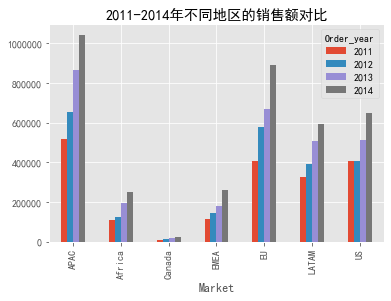

In [20]:
# 各地区每年的销售额
sales_area_year = sales_area = data.groupby(by=['Market','Order_year'])['Sales'].sum()

# reset_index 还原原索引，将分组后的多次索引设置成列数据
sales_area_year = sales_area_year.reset_index(level=[0,1])

# pivot_table 使用数据透视表重新整理数据
sales_area_year = pd.pivot_table(sales_area_year,
                                index = 'Market',
                                columns = 'Order_year',
                                values = 'Sales')
# 绘制图形
plt.figure(figsize=(20,8),dpi=80)
sales_area_year.plot(kind='bar',title='2011-2014年不同地区的销售额对比')
plt.show()

<Figure size 1600x640 with 0 Axes>

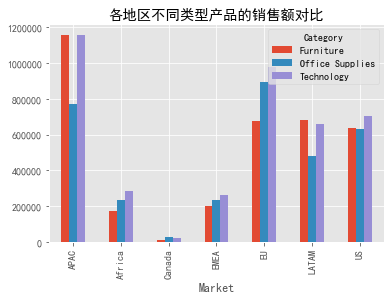

In [21]:
# 各地区不同类型产品的销售额
sales_area_Category = data.groupby(by=['Market','Category'])['Sales'].sum()

# reset_index 还原原索引，将分组后的多次索引设置成列数据
sales_area_Category = sales_area_Category.reset_index(level=[0,1])

# pivot_table 使用数据透视表重新整理数据
sales_area_Category = pd.pivot_table(sales_area_Category,
                                index = 'Market',
                                columns = 'Category',
                                values = 'Sales')
# 绘制图形
plt.figure(figsize=(20,8),dpi=80)
sales_area_Category.plot(kind='bar',title='各地区不同类型产品的销售额对比')
plt.show()

### 3.3 销售淡旺季分析

<Figure size 1600x640 with 0 Axes>

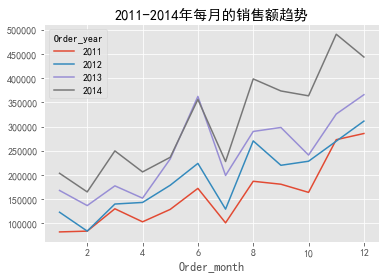

In [28]:
sales_year_month = data.groupby(by=['Order_year','Order_month'])['Sales'].sum()

# reset_index 还原原索引，将分组后的多次索引设置成列数据
sales_year_month = sales_year_month.reset_index(level=[0,1])

# pivot_table 使用数据透视表重新整理数据
sales_year_month = pd.pivot_table(sales_year_month,
                                index = 'Order_month',
                                columns = 'Order_year',
                                values = 'Sales')
# 绘制图形
plt.figure(figsize=(20,8),dpi=80)
sales_year_month.plot(title='2011-2014年每月的销售额趋势')
plt.show()

### 3.4 新增客户

In [37]:
data_customer = data.copy()
data_customer = data_customer.drop_duplicates(subset=['CustomerID'])
new_customer = data_customer.groupby(by=['Order_year','Order_month']).size()
new_customer = new_customer.reset_index(level=[0,1])
new_customer = pd.pivot_table(new_customer,
                             index = 'Order_month',
                             columns = 'Order_year',
                             values = 0,
                             fill_value = 0)

new_customer

Order_year,2011,2012,2013,2014
Order_month,,,,
1,176,27,10,3
2,120,19,4,4
3,164,25,7,2
4,133,16,6,2
5,113,15,6,1
6,142,32,9,8
7,59,11,6,3
8,108,29,10,0
9,73,25,9,2


## 用户RFM模型
- R 用户是否活跃，越小越好，0
- F 用户忠诚度，越大越好，1
- M 用户贡献度，越大越好，1

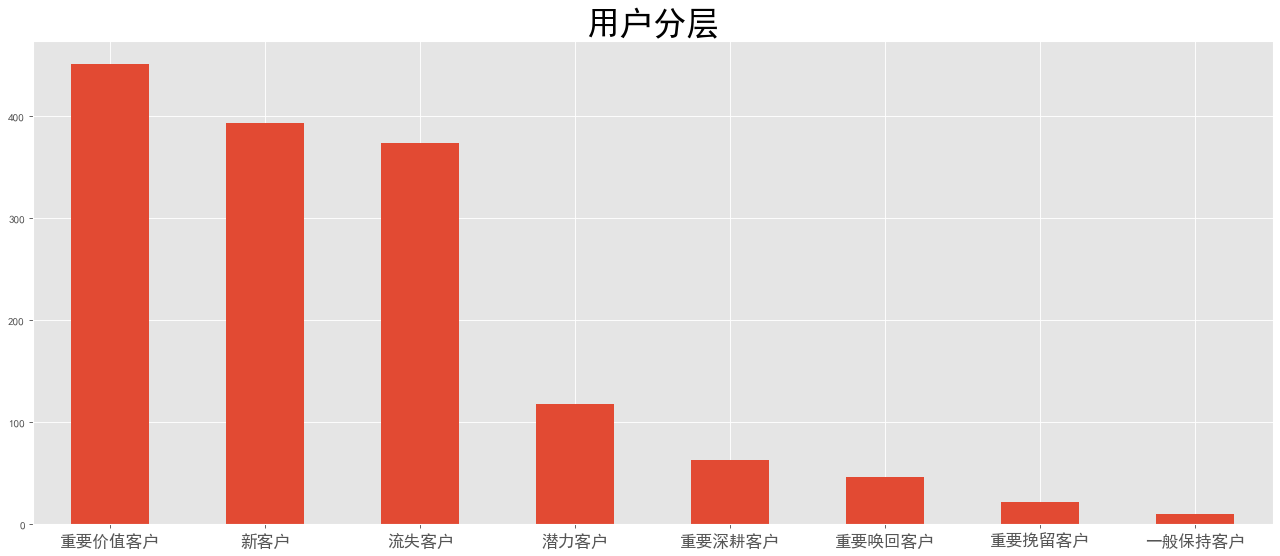

In [63]:
# 获取2014年数据
data_2014 = data[data['Order_year']==2014]
data_2014 = data_2014[['CustomerID','OrderID','OrderDate','Sales']]

custom_2014df = data_2014.copy()
custom_2014df.set_index('CustomerID',drop=True,inplace=True)
custom_2014df['orders'] = 1

rfm = pd.pivot_table(custom_2014df,
                    index = ['CustomerID'],
                    values = ['OrderDate','orders','Sales'],
                    aggfunc = {'OrderDate':'max',
                              'orders':'sum',
                              'Sales':'sum'})

rfm['R'] = (rfm.OrderDate.max()-rfm.OrderDate).dt.days
rfm.rename(columns={'Sales':'M','orders':'F'},inplace=True)
rfm


def rfm_func(x):
    level = x.apply(lambda x:"1" if x>=0 else '0')
    label = level.R + level.F + level.M
    d = {
        '011':'重要价值客户',
        '111':'重要唤回客户',
        '001':'重要深耕客户',
        '101':'重要挽留客户',
        '010':'潜力客户',
        '110':'一般保持客户',
        '000':'新客户',
        '100':'流失客户'
    }
    result = d[label]
    return result
    
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)


# 各类型客户分类统计
# rfm.groupby('label').size()
rfm_count = rfm['label'].value_counts()

plt.figure(figsize=(20,8),dpi=80)
rfm_count.plot.bar()
plt.xticks(fontsize=15,rotation=0)
plt.title('用户分层',fontsize=30)
plt.show()